# Index Funds and Mutual Funds Portfolio

https://en.wikipedia.org/wiki/Index_fund  
https://en.wikipedia.org/wiki/Mutual_fund  


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['FXAIX', 'SCHA', 'VUG','VXUS', 'VT', 'VBTLX']
start = '2016-01-01'
end = '2023-02-16'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,FXAIX,SCHA,VBTLX,VT,VUG,VXUS
Date,,,,,,
2016-01-04 00:00:00-05:00,61.309822,23.162508,8.956875,48.489296,97.572716,36.095501
2016-01-05 00:00:00-05:00,61.431198,23.171577,8.948476,48.497860,97.591370,36.030361
2016-01-06 00:00:00-05:00,60.650963,22.831553,8.982082,47.778858,96.518333,35.419678
2016-01-07 00:00:00-05:00,59.211845,22.205906,8.990480,46.666134,94.036339,34.686863
2016-01-08 00:00:00-05:00,58.570309,21.874947,9.007293,46.118324,93.159218,34.279736


In [3]:
df.tail()

,FXAIX,SCHA,VBTLX,VT,VUG,VXUS
Date,,,,,,
2023-02-09 00:00:00-05:00,141.710007,44.400002,9.65,92.419998,239.679993,55.580002
2023-02-10 00:00:00-05:00,142.050003,44.470001,9.61,92.250000,238.130005,55.320000
2023-02-13 00:00:00-05:00,143.690002,45.009998,9.63,93.269997,241.679993,55.790001
2023-02-14 00:00:00-05:00,143.669998,45.070000,9.59,93.330002,243.020004,55.799999
2023-02-15 00:00:00-05:00,144.110001,45.540001,9.57,93.379997,244.979996,55.520000


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

7 years


In [7]:
delta = d1 - d2
years = relativedelta.relativedelta(d2,d1).years
years

7

In [8]:
r = relativedelta.relativedelta(d1, d2)
months = -(r.months + (12*r.years))
months

85

In [9]:
delta = d1 - d2
days = delta.days
-(days)

2603

In [10]:
print("Years of Investing: %s" % years)
print("Months of Investing: %s" % months)
print("Days of Investing: %s" % -days)

Years of Investing: 7
Months of Investing: 85
Days of Investing: 2603


In [11]:
diff = relativedelta.relativedelta(d2, d1)

years = diff.years
months = diff.months
days = diff.days

print('Long term Investing Dates:')
print('{} years {} months {} days'.format(years, months, days))

Long term Investing Dates:
7 years 1 months 15 days


In [12]:
Number_of_Stocks = len(symbols)
Number_of_Stocks

6

In [13]:
percent_invest = round((100/Number_of_Stocks)/100,2)
percent_invest

0.17

In [14]:
print('Percentage of invest:')
Cash = 100000
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    percentages = (round(cost,3)/Cash)*100
    print('{}: {}%'.format(i, percentages))

Percentage of invest:
FXAIX: 17.0%
SCHA: 17.0%
VBTLX: 17.0%
VT: 17.0%
VUG: 17.0%
VXUS: 17.0%


In [15]:
print('Number of Shares:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
FXAIX: 277
SCHA: 733
VBTLX: 1897
VT: 350
VUG: 174
VXUS: 470


In [16]:
print('Beginning Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
FXAIX: $16982.82
SCHA: $16978.12
VBTLX: $16991.19
VT: $16971.25
VUG: $16977.65
VXUS: $16964.89


In [17]:
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
FXAIX: $39918.47
SCHA: $33380.82
VBTLX: $18154.29
VT: $32683.0
VUG: $42626.52
VXUS: $26094.4


In [18]:
print('Short Selling')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Short Selling
Current Value:
FXAIX: $7173.25
SCHA: $8639.62
VBTLX: $15907.41
VT: $8825.05
VUG: $6732.52
VXUS: $11045.22


In [19]:
short_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    short_result.append(Current_Value)
print('Total Value of Shorting: $%s' % round(sum(short_result),2))

Total Value of Shorting: $58323.07


In [20]:
print('Buy Long')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Buy Long
Current Value:
FXAIX: $39918.47
SCHA: $33380.82
VBTLX: $18154.29
VT: $32683.0
VUG: $42626.52
VXUS: $26094.4


In [21]:
long_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    long_result.append(Current_Value)
print('Total Long Value: $%s' % round(sum(long_result),2))

Total Long Value: $192857.5


In [22]:
print('Which is more profit? Long or Short?')
print('Total Value of Long: $%s' % round(sum(long_result),2))
print('Total Value of Shorting: $%s' % round(sum(short_result),2))
if sum(short_result) >= sum(long_result):
   print("Short the portfolio!")
else:
   print("Long the portfolio!")

Which is more profit? Long or Short?
Total Value of Long: $192857.5
Total Value of Shorting: $58323.07
Long the portfolio!


In [23]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {:.2f}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: FXAIX: 135.05%
Holding Period Return: SCHA: 96.61%
Holding Period Return: VBTLX: 6.85%
Holding Period Return: VT: 92.58%
Holding Period Return: VUG: 151.07%
Holding Period Return: VXUS: 53.81%


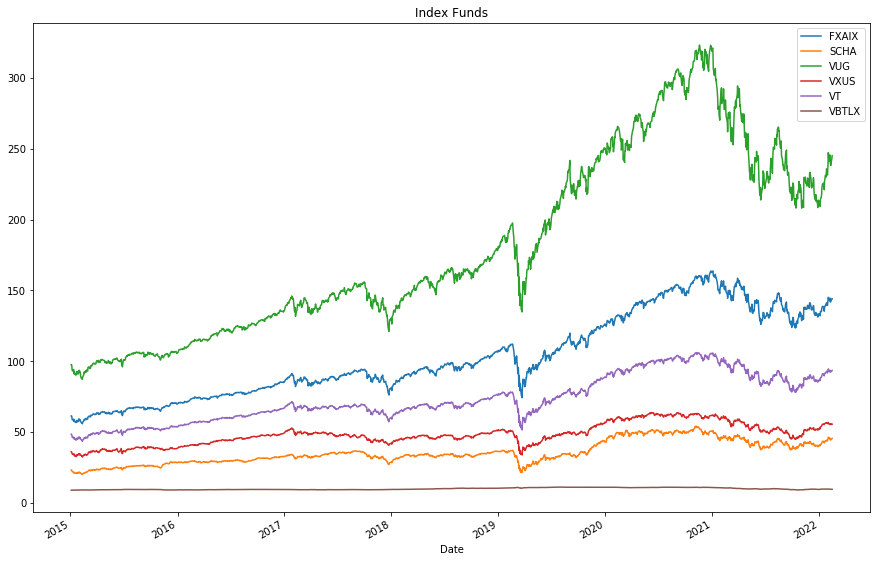

In [24]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Index Funds')
plt.legend()

In [25]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

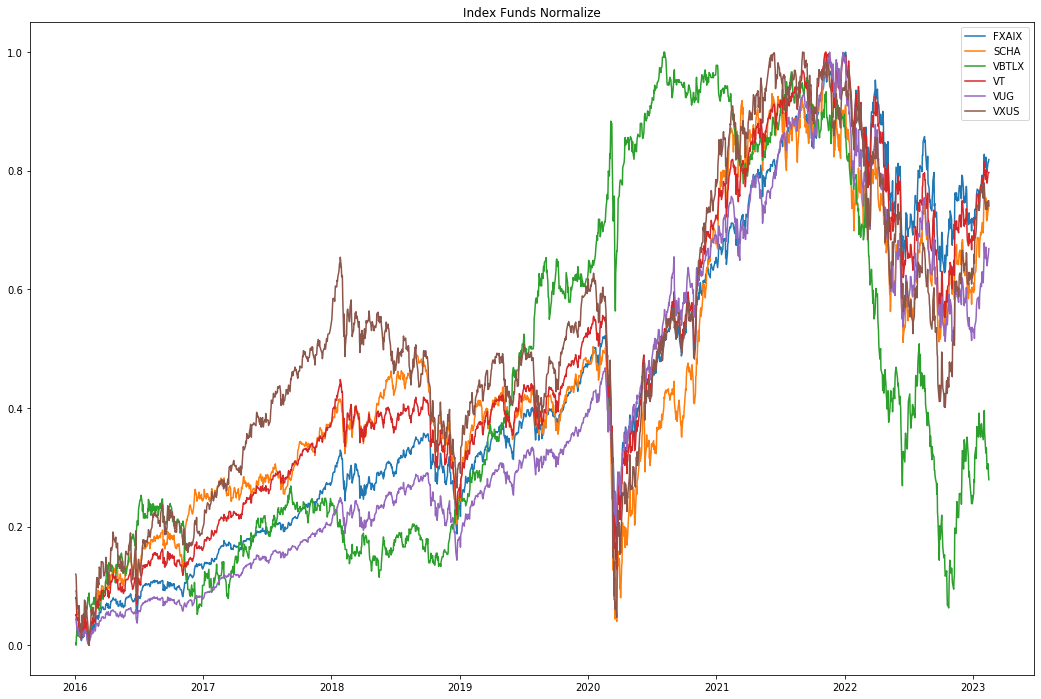

In [26]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Index Funds Normalize')
plt.legend(labels=normalize.columns)

In [27]:
df.min()

FXAIX    55.856796
SCHA     20.056946
VBTLX     8.948476
VT       43.490582
VUG      87.290123
VXUS     32.349972
dtype: float64

In [28]:
for s in symbols:
    print(s + ":",  df[s].max())

FXAIX: 163.64781188964844
SCHA: 54.07434844970703
VUG: 323.0956115722656
VXUS: 63.633888244628906
VT: 106.07701873779297
VBTLX: 11.176348686218262


In [29]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,FXAIX Return,SCHA Return,VUG Return,VXUS Return,VT Return,VBTLX Return
Date,,,,,,
2016-01-05 00:00:00-05:00,0.001980,0.000392,0.000191,-0.001805,0.000177,-0.000938
2016-01-06 00:00:00-05:00,-0.012701,-0.014674,-0.010995,-0.016949,-0.014825,0.003756
2016-01-07 00:00:00-05:00,-0.023728,-0.027403,-0.025715,-0.020689,-0.023289,0.000935
2016-01-08 00:00:00-05:00,-0.010835,-0.014904,-0.009327,-0.011737,-0.011739,0.001870


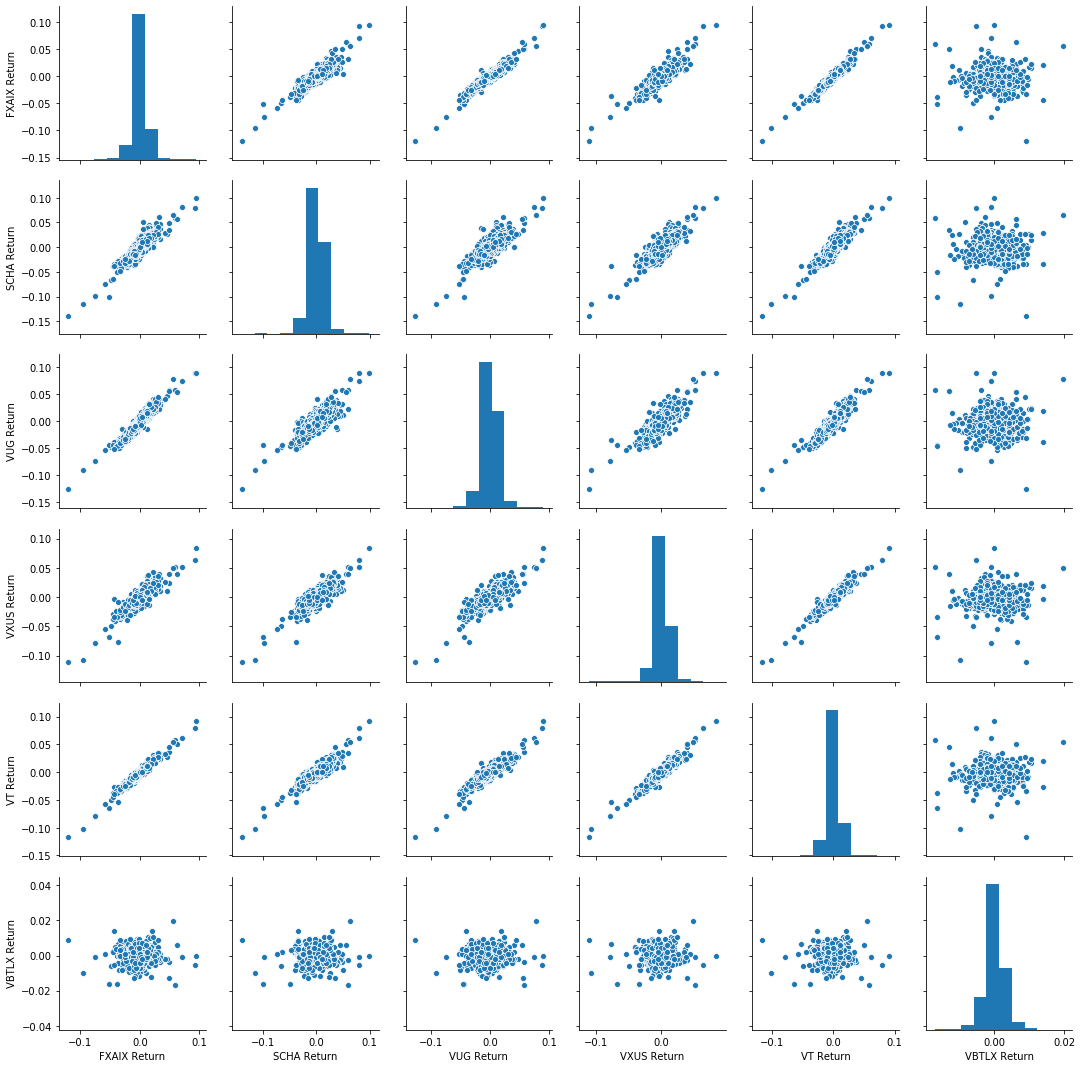

In [30]:
sns.pairplot(returns[1:])

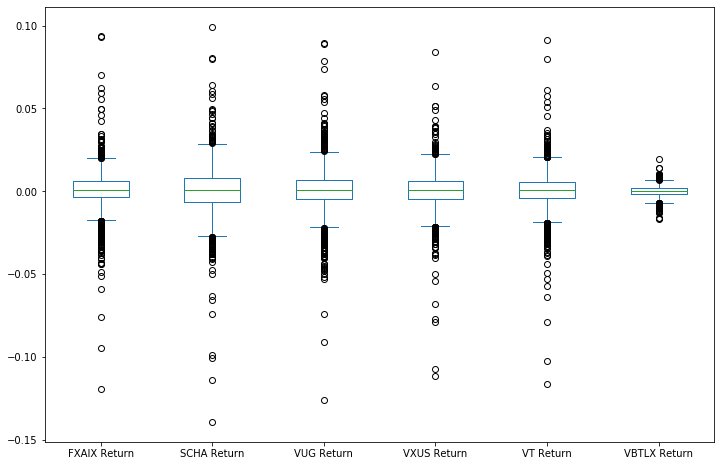

In [31]:
returns.plot(kind='box',figsize=(12,8))

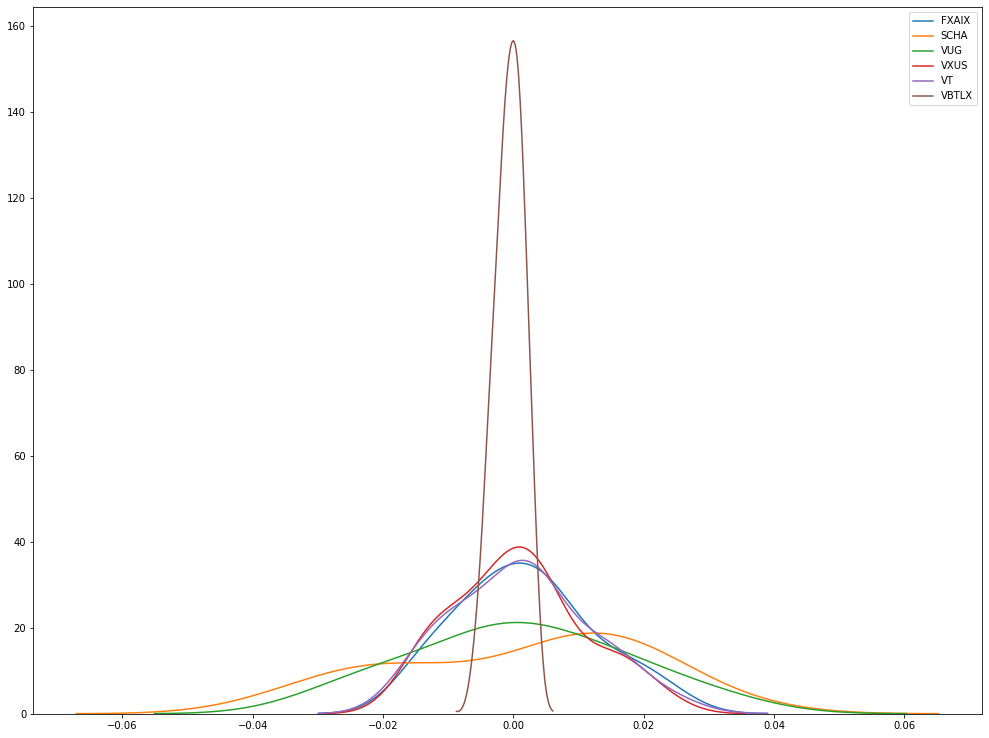

In [32]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2021-03-01" : "2021-03-31 "][r])
    plt.legend(labels=symbols)

In [33]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

FXAIX Return   2020-03-24 00:00:00-04:00
SCHA Return    2020-03-24 00:00:00-04:00
VUG Return     2020-03-24 00:00:00-04:00
VXUS Return    2020-03-24 00:00:00-04:00
VT Return      2020-03-24 00:00:00-04:00
VBTLX Return   2022-11-10 00:00:00-05:00
dtype: datetime64[ns, America/New_York]


In [34]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

FXAIX Return   2020-03-16 00:00:00-04:00
SCHA Return    2020-03-16 00:00:00-04:00
VUG Return     2020-03-16 00:00:00-04:00
VXUS Return    2020-03-16 00:00:00-04:00
VT Return      2020-03-16 00:00:00-04:00
VBTLX Return   2020-03-17 00:00:00-04:00
dtype: datetime64[ns, America/New_York]


In [35]:
returns.corr()

,FXAIX Return,SCHA Return,VUG Return,VXUS Return,VT Return,VBTLX Return
FXAIX Return,1.000000,0.900718,0.957364,0.870928,0.973612,-0.071233
SCHA Return,0.900718,1.000000,0.840902,0.838815,0.914107,-0.075246
VUG Return,0.957364,0.840902,1.000000,0.816674,0.928085,-0.003994
VXUS Return,0.870928,0.838815,0.816674,1.000000,0.955075,-0.047504
VT Return,0.973612,0.914107,0.928085,0.955075,1.000000,-0.055899
VBTLX Return,-0.071233,-0.075246,-0.003994,-0.047504,-0.055899,1.000000


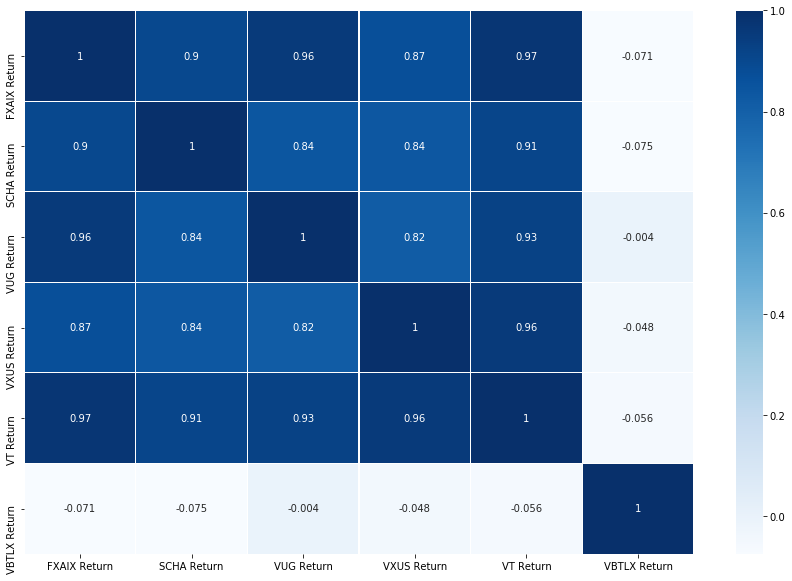

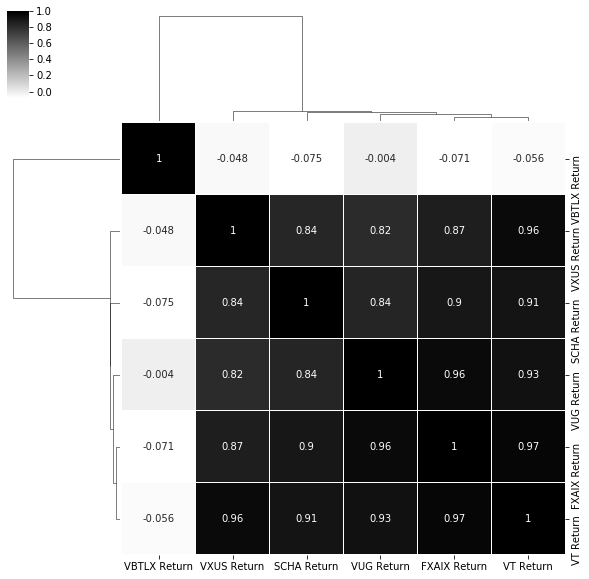

In [36]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

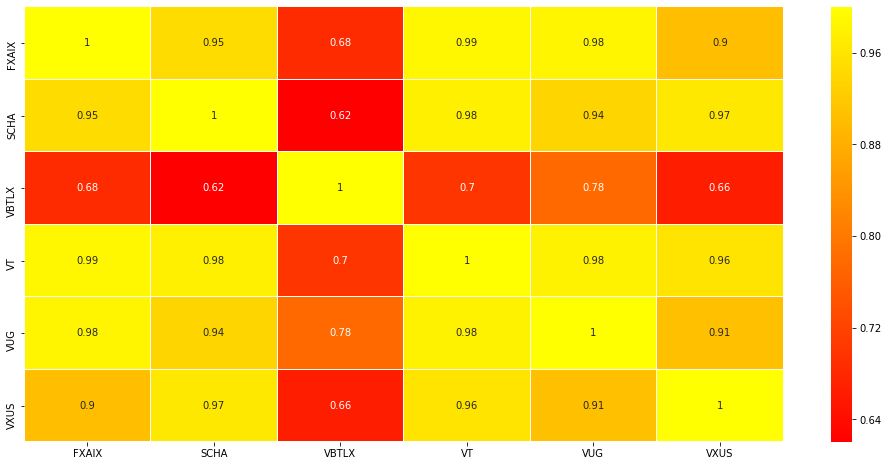

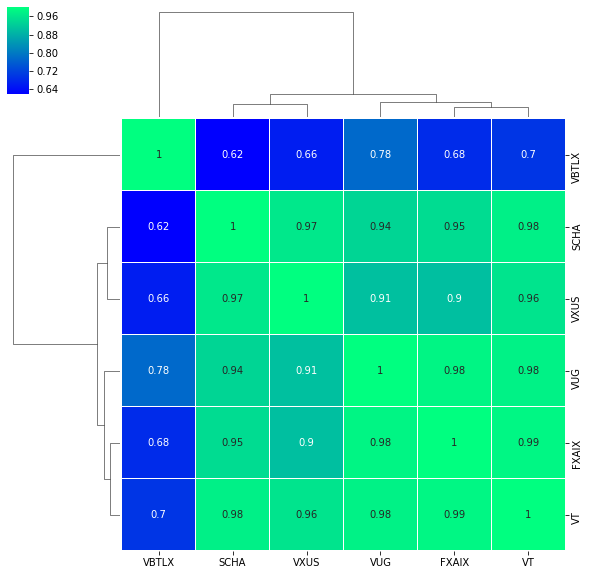

In [37]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

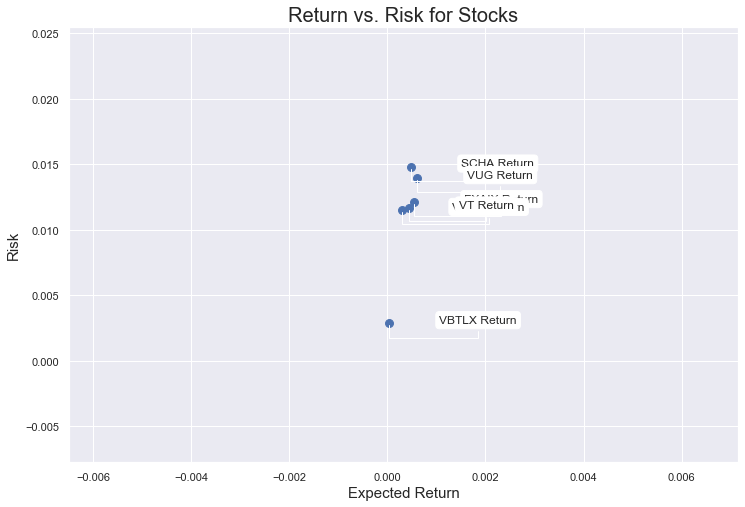

In [38]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [39]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [40]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [41]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------------------
90%                 [-0.01497458 -0.01850986 -0.00364138 -0.0144661  -0.01725704 -0.01445132]
95%                 [-0.01937581 -0.02389556 -0.00468531 -0.01869003 -0.02232252 -0.01863518]
99%                 [-0.02763178 -0.03399822 -0.00664354 -0.02661343 -0.03182452 -0.02648339]


In [42]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
FXAIX: -0.015
SCHA: -0.0185
VBTLX: -0.0036
VT: -0.0145
VUG: -0.0173
VXUS: -0.0145


In [43]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 90%:
FXAIX: $1000.00
SCHA: $2000.00
VBTLX: $0.00
VT: $1000.00
VUG: $2000.00
VXUS: $1000.00


In [44]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 99%:
FXAIX: $3000.00
SCHA: $3000.00
VBTLX: $1000.00
VT: $3000.00
VUG: $3000.00
VXUS: $3000.00
